CODSOFT INTERNSHIP
TASK 3 : SALES PREDICTION USING PYTHON
SUBMITTED BY : SHIVKUMAR MITTAL

In [1]:
# Importing basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file
data = pd.read_csv("advertising.csv")

In [3]:
# Showing top 5 rows of the dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Showing info about no of columns,rows,nullvalue and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


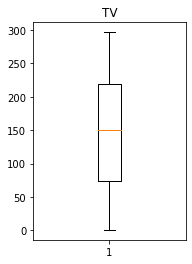

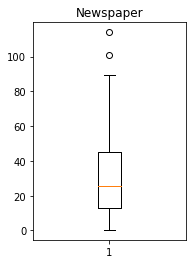

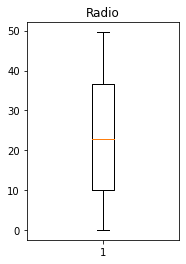

In [29]:
# Check the outliers
plt.subplot(1,2,1)
plt.title('TV')
plt.boxplot(data['TV'])
plt.show()

plt.subplot(1,2,1)
plt.title('Newspaper')
plt.boxplot(data['Newspaper'])
plt.show()

plt.subplot(1,2,1)
plt.title('Radio')
plt.boxplot(data['Radio'])
plt.show()


In [4]:
# Check the summary statistics of the numerical columns
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


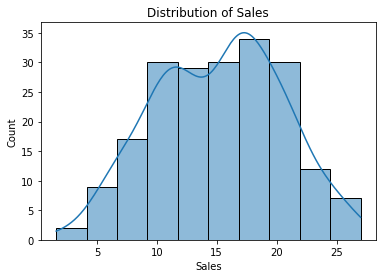

In [6]:
# Visualize the distribution of the target variable (Sales)
import seaborn as sns
sns.histplot(data['Sales'], kde=True)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

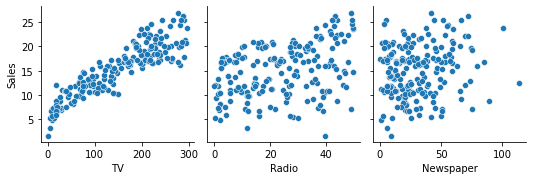

In [7]:
# Visualize the relationships between the features and the target variable
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

We can see from above graph that sales are more dependent on TV advertisement then Radio and Newspaper

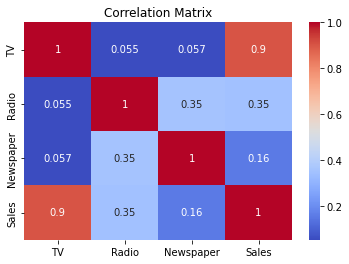

In [8]:
# Calculate the correlation matrix
correlation = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Separate the features (TV, Radio, Newspaper) and the target variable (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate metrics for Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Print metrics
print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared Score:", linear_r2)

Linear Regression:
Mean Squared Error: 2.9077569102710923
R-squared Score: 0.9059011844150826


In [11]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("R-squared Score:", dt_r2)

Decision Tree Regression:
Mean Squared Error: 3.4534999999999996
R-squared Score: 0.888240224458029


In [12]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared Score:", rf_r2)

Random Forest Regression:
Mean Squared Error: 1.4386562000000012
R-squared Score: 0.953443204287226
